Part 1 – **Data Cleaning**

In [3]:
import pandas as pd 
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\bi.csv", encoding = "cp1256")
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


1 - Check dataset structure

In [8]:
df.shape

(77, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


Question: Which columns should be categorical and which should be numerical?

categorical columns : 6  -  numerical columns : 5 

Categorical: fNAME , lNAME , gender , country , residence , prevEducation

Numerical: age , entryEXAM , studyHOURS , Python , DB

2 - Detect inconsistent categories

In [15]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [17]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [19]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [21]:
df['gender'] = df['gender'].str.lower() 
df['gender'] = df['gender'].replace(['female','f'],'F')
df['gender'] = df['gender'].replace(['male','m'],'M')
df['gender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
df['country'] = df['country'].replace('norway' , 'Norway')
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK', 'Somali',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [25]:
df['prevEducation'] = df['prevEducation'].replace(['diploma','DIPLOMA','Diplomaaa'] , 'Diploma')
df['prevEducation'] = df['prevEducation'].replace('HighSchool' , 'High School')
df['prevEducation'] = df['prevEducation'].replace('Barrrchelors' , 'Bachelors')
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

3 - Handle duplicates

In [28]:
df.duplicated().sum()

0

In [30]:
df.drop_duplicates(inplace = True)

What inconsistencies you found and how you fixed them ?

1 - Gender column

Issue: Values appeared in mixed formats like "Male", "male", "M", and "Female", "female", "F".

Fix: Converted all values to lowercase using .str.lower(), then standardized using .replace() to keep only "M" and "F".

2 - Country column

Issue: Country names had inconsistent cases (e.g., "norway", "Norway").

Fix: Standardized using .replace() to unify values, e.g., "norway" → "Norway".

3 - prevEducation column

Issue: ypos and inconsistent formats such as "Barrrchelors" vs "Bachelor", "HighSchool" vs "High School", and ["diploma", "DIPLOMA", "Diplomaaa"] vs "Diploma".

Fix: Corrected misspelled entries manually using .replace().

- Duplicates

Issue: No rows were completely duplicated.

Fix: Verified using df.duplicated().sum() and ensured dataset consistency by applying df.drop_duplicates().

Part 2 – **Missing Data**

1 - Identify missing values

In [34]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

Question: Which columns are most affected by missing values?

Python column have 2 missing values 

2 - Impute missing values

Option 1: Fill with Mean

In [40]:
df_mean = df.copy()
df_mean["Python"].fillna(df_mean["Python"].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6452\915564648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean["Python"].fillna(df_mean["Python"].mean(), inplace=True)


In [42]:
df_mean.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.000000,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.000000,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.000000,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,75.853333,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.000000,80


In [44]:
df_median = df.copy()
df_median["Python"].fillna(df_median["Python"].median(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6452\2503032827.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median["Python"].fillna(df_median["Python"].median(), inplace=True)


In [46]:
df_median.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80


**Mean** : sensitive to outliers , So this is the best solution.

**Median** : Not sensitive to outliers.

In [49]:
df["Python"].fillna(df["Python"].median(), inplace=True)
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6452\3976076892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Python"].fillna(df["Python"].median(), inplace=True)


,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80


How missing values were imputed and why ?

- Numerical Column: Python (2 missing values)

- Median Imputation: Missing values in the Python column were filled with the median.

Reason: The median is more robust in the presence of outliers because it is not affected by extreme values. 

- Mean Imputation (for comparison): Alternatively, the mean was also tested.

Reason: The mean preserves the overall trend of the data, but it can be heavily influenced by outliers, which may lead to biased results.


Part 3 – **Outliers**

1 - Detect outliers

<Axes: >

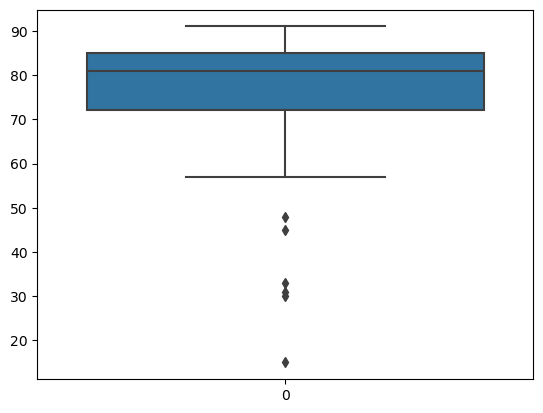

In [53]:
sns.boxplot(df["Python"])

<Axes: >

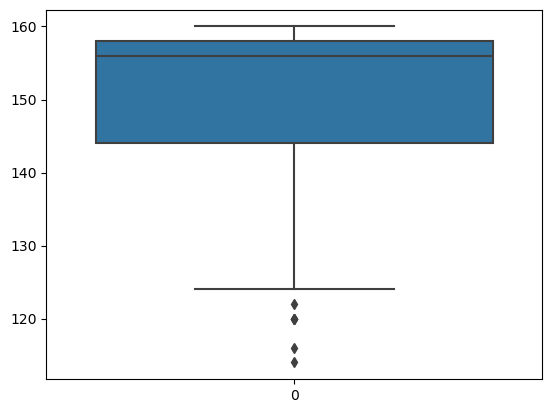

In [55]:
sns.boxplot(df['studyHOURS'])

<Axes: >

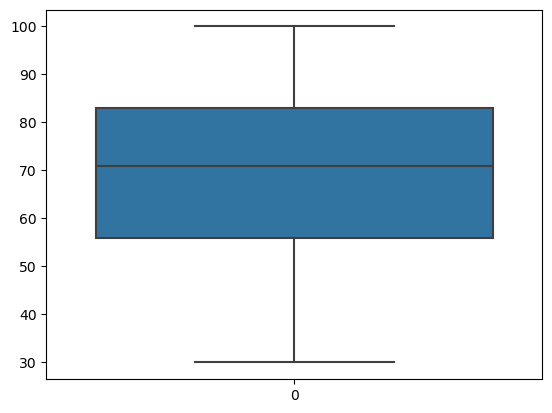

In [57]:
sns.boxplot(df['DB']) 

Question: Which values in studyHOURS, Python, or DB look unrealistic?

Python 

**Yes** , they are wrong if we compare them to the other numbers in the dataset, because they look unrealistic or inconsistent.

**No** , they are not wrong if we consider that they might be real values — for example, someone could actually be weak in Python or score unusually low.

2 - Handle outliers

Apply IQR method

In [63]:
Q1 = df["Python"].quantile(0.25)
Q3 = df["Python"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Python"] >= lower_bound) & (df["Python"] <= upper_bound)]

df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,F,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,M,Uganda,Sognsvann,55,High School,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,81.0,44
4,Maria,Kedibone,23,F,South Africa,Sognsvann,65,High School,122,91.0,80


How outliers were detected and treated ?

- Detection methods used :

Outliers were detected using Boxplots (sns.boxplot) for the columns Python, DB, and studyHOURS.

Additionally, the IQR method was applied to calculate lower and upper bounds for potential outliers.

-- Python Column : 

- Detection:

The boxplot showed several unusually low values: 15, 30, 31, 33, 45, and 48.

- Interpretation:

Statistically, these were identified as outliers since they fell below the IQR lower bound.

From a real-world perspective, while they might represent very weak performance, they were considered too extreme compared to the rest of the dataset.

- Treatment:

These outlier rows were removed from the dataset to improve data quality and avoid skewing model training.

-- studyHOURS Column :

- Detection:

The boxplot showed some low values in study hours.

- Interpretation:

These were not considered unrealistic, since some students may indeed study very little.

- Treatment:

No rows were removed. The values were kept in the dataset.    

New Dataset

cleaned version of the dataset

In [67]:
# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_students.csv", index=False)   